# Dragon Real Estate - Price prediction

In [1]:
import pandas as pd

In [2]:
hou_data = pd.read_csv("bostan_housing_data.csv")
hou_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
hou_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
hou_data['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
hou_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

In [8]:
# hou_data.hist(bins = 40,figsize=(20,20))

# Train test splitting

In [9]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)    #data change na hone ke liye nhi to test data bachega hi nhi bcz agli var data randomly select hoga
    shuffled = np.random.permutation(len(data)) #randomly data select krne ke liye
    test_set_size = int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices= shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
# train_set,test_set = split_train_test(hou_data,0.2)

In [11]:
# train_set.head()

In [12]:
# len(train_set)

In [13]:
# test_set.head()

In [14]:
# len(test_set)

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(hou_data,test_size=0.2,random_state =42)

In [16]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2


In [17]:
len(train_set)

404

In [18]:
test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1


In [19]:
len(test_set)

102

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size =0.2,random_state =42)
for train_index,test_index in split.split(hou_data,hou_data['CHAS']):
    strat_train_set = hou_data.loc[train_index]
    strat_test_set = hou_data.loc[test_index]

In [21]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [23]:
hou_data = strat_train_set.copy()

# Looking for correlations

In [24]:
correl_matrix = hou_data.corr()
correl_matrix['MEDV'].sort_values(ascending =False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [25]:
from pandas.plotting import scatter_matrix

In [26]:
# attributes =["MEDV","RM","ZN","LSTAT"]
# scatter_matrix(hou_data[attributes],figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

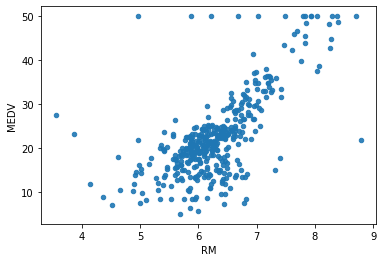

In [27]:
hou_data.plot(kind="scatter",x ="RM",y="MEDV",alpha = 0.9)   #here alpha denotes densify of points

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

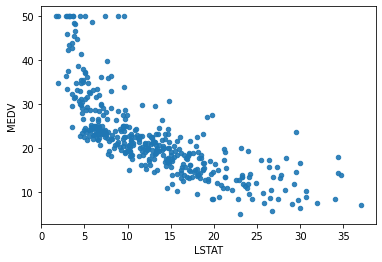

In [28]:
hou_data.plot(kind="scatter",x ="LSTAT",y="MEDV",alpha = 0.9) 

# Tring attributes combination

In [29]:
hou_data['TAXRM'] = hou_data['TAX']/hou_data['RM']
hou_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [30]:
correl_matrix = hou_data.corr()
correl_matrix['MEDV'].sort_values(ascending =False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

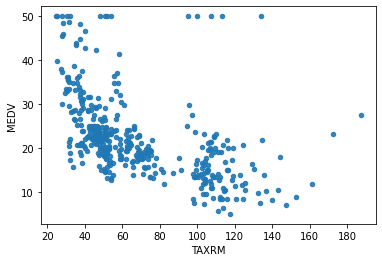

In [31]:
hou_data.plot(kind="scatter",x ="TAXRM",y="MEDV",alpha = 0.9) 

In [32]:
hou_data = strat_train_set.drop("MEDV",axis = 1)
hou_labels = strat_train_set["MEDV"].copy()

# Missing attributes

In [33]:
# # to take care of missing attributes, there are three options:
#     1.get rid of missing datapoints
#     2.get rid of whole attributes
#     3.set the value as mean or median

In [34]:
# Option 1
a =hou_data.dropna(subset=["RM"])
a.shape

(404, 13)

In [35]:
# option 1
hou_data.drop("RM",axis=1).shape

(404, 12)

In [36]:
# Option 3
median = hou_data["RM"].median()
hou_data["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(hou_data)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [39]:
X = imputer.transform(hou_data)

In [40]:
housing_tr = pd.DataFrame(X, columns =hou_data.columns)

In [41]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

Primarily, There are three type of objects:
1. Estimator - It estimates some parameter based on dataset. Eg. Imputer. It has a fit method and transform mathod. Fit method - fits the dataset and calculate internal parameters

2. Transformers - takes input and return output based on the learnings from fit().It also has a convenience function called fit_transform() which fits and then transform.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common function. It also give some score function which will evaluate the prediction.

## Feature scaling

Primarily, Two types of feature scaling methods:
1. Min-Max Scaling(Normalization): (Value-min)/(max-min)
  Sklearn provides a class called MinMaxScaler for this.
  
2. Standardization
  (Value-mean)/std
  Sklearn provides a class called StanderdScaler for this.

# Creating a pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [43]:
housing_num_tr = my_pipeline.fit_transform(hou_data)

In [44]:
housing_num_tr.shape

(404, 13)

# Selecting a desired model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,hou_labels)

RandomForestRegressor()

In [46]:
some_data = hou_data.iloc[:5]

In [47]:
some_labels = hou_labels.iloc[:5]

In [48]:
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.361, 25.362, 16.562, 23.308, 23.405])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(hou_labels, housing_predictions)
rmse = np.sqrt(mse)

In [51]:
rmse

1.2271976558947875

In [52]:
#overfitting

# Using better evaluation technique - cross validation

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr,hou_labels,scoring="neg_mean_squared_error", cv =10)
rmse_score = np.sqrt(-scores)

In [54]:
rmse_score

array([2.83755486, 2.99592067, 4.43142695, 2.52679868, 3.7045696 ,
       2.73003335, 4.728319  , 3.31889682, 3.41555664, 3.1585488 ])

In [55]:
def print_score(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [56]:
print_score(rmse_score)

Scores: [2.83755486 2.99592067 4.43142695 2.52679868 3.7045696  2.73003335
 4.728319   3.31889682 3.41555664 3.1585488 ]
Mean: 3.384762538446277
Standard Deviation: 0.6837245547333685


# Saving the Model

In [58]:
from joblib import dump,load
dump(model,'dragon.joblib')

['dragon.joblib']

# Testing the Model on test data

In [59]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared= my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse= np.sqrt(final_mse)

In [60]:
final_rmse

2.889346099440655

In [62]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the model

In [63]:
from joblib import dump,load
import numpy as np
model = load('dragon.joblib')
input = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(input)

array([22.361])